In [331]:
def log_int_float_convert(value):
    if value == int(value):
        return int(value)
    else:
        return f"{value:.8f}".rstrip('0').rstrip('.')
def extract_parameters_from_filename(filename):
    """Extract parameters from the given filename and return them as a dictionary."""
    filename = filename.split('\\')[4:]
    filename = filename[0].split('_')[2:]

    # filename[0] = filename[0].split('\\')[-1]
    # filename = filename.split('\\')[1:]
    # print(filename)
    # filename = filename[-1].split('_')

    params = {
        r'$\tau$': log_int_float_convert(float(filename[0])),
        r'$L$': log_int_float_convert(float(filename[1])),
        r'$NE_ std$': log_int_float_convert(float(filename[2])),
        r'${\gamma}_ std$': log_int_float_convert(float(filename[3])),
        r'${\dot{X}}_ std$': log_int_float_convert(float(filename[4])),
        r'${\dot{\gamma}}_ std$': log_int_float_convert(float(filename[5])),
        r'$R_{N}$': log_int_float_convert(float(filename[6])),
        r'$R_{E}$': log_int_float_convert(float(filename[7])),
        r'$R_{\gamma}$': log_int_float_convert(float(filename[8])),
        r'$R_{\dot{X}}$': log_int_float_convert(float(filename[9])),
        r'$R_{\dot{\gamma}}$': log_int_float_convert(float(filename[10]))
    }
    return params

def parse_json_file(file_path):
    """
    Parse JSON file and organize data by topic.
    
    Parameters:
    file_path (str): Path to the JSON file
    
    Returns:
    dict: Data organized by topic
    """
    data_by_topic = {}  # Dictionary to store data organised by topic

    with open(file_path, 'r') as file:
        for line in file:
            try:
                # Parse each JSON object
                obj = json.loads(line.strip())
                
                # Get the topic name from the JSON object
                topic_name = obj.get("topic_name")
                
                # Initialize the list for this topic if it doesn't exist
                if topic_name not in data_by_topic:
                    data_by_topic[topic_name] = []
                    
                # Append the data to the appropriate topic list
                data_by_topic[topic_name].append(obj)

            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")

    # Print summary of data
    # print("\nData organized by topic:")
    # for topic, items in data_by_topic.items():
    #     print(f"{topic}: {len(items)} entries")

    return data_by_topic

Use blackboard 

In [252]:
filename = r'.venv\uos_feeg6043_build\src\logs\0.40000_0.25000_0.00000_0.00000_0.00000_0.00000_0.00010_0.00010_0.00000_0.00010_0.00000_20250307_145232_log.json'

In [322]:
import json
import pandas as pd
import numpy as np
import re
import os 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

file_path = rf'C:\Users\Tommy\OneDrive - University of Southampton\Desktop\UoS\Uos Part 4\Robotics\{filename}'  # Replace with your file path
aruco_path = r'C:\Users\Tommy\OneDrive - University of Southampton\Desktop\UoS\Uos Part 4\Robotics\Assignment\20250304_124444\25_Tag_25.csv'  # Replace with your file path


## Loop 

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_0.0000001_0.00017453_0.0000001_0.00017453_0.0001_0.0001_0.00017453_0.0001_0.00017453_20250307_183835_log.json
RMSE Northings: 0.11879736844086149, Sum northings: 53.53305790756362
RMSE Northings: 0.22338373624177574, sum eastings: 107.69977844748544
RMSE Northings: 1.97918154649997, sum headings: 596.0060250443034


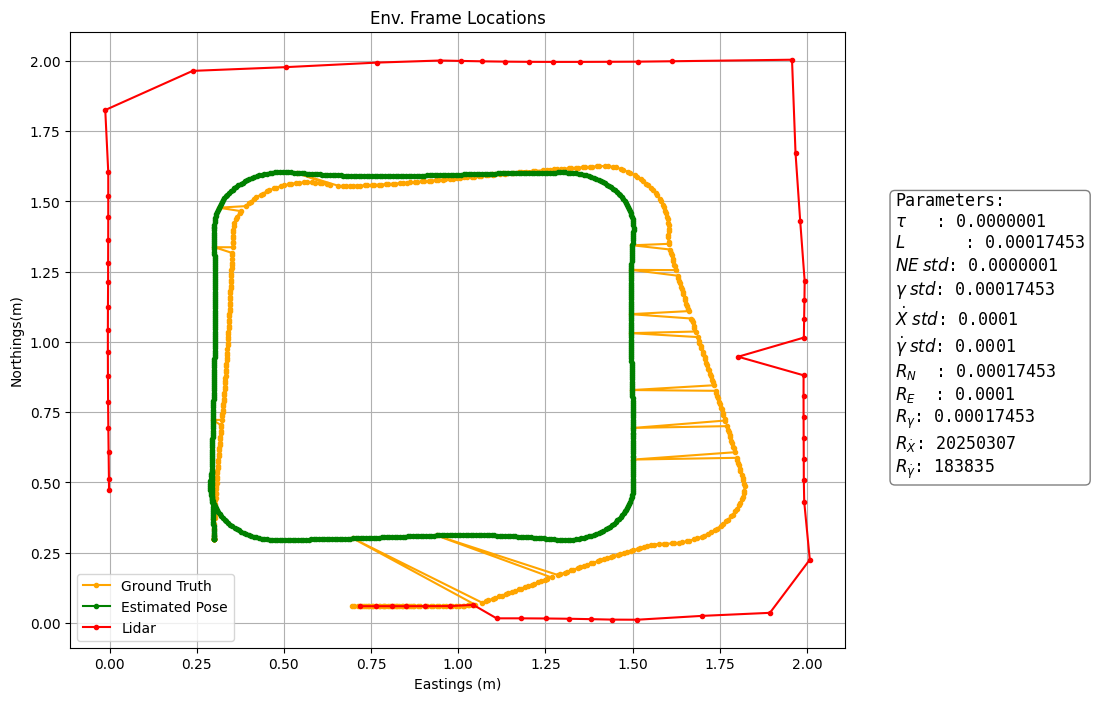

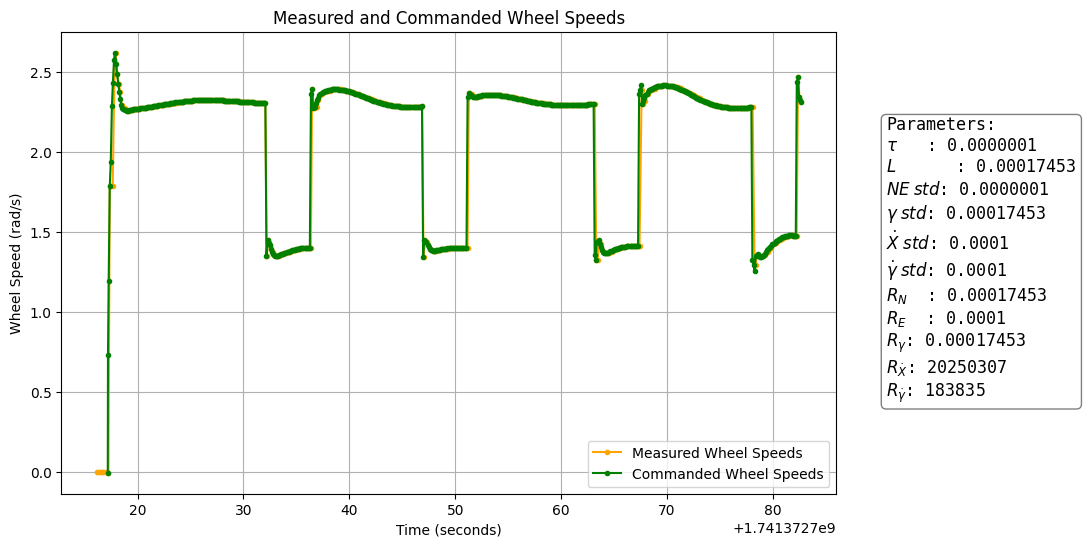

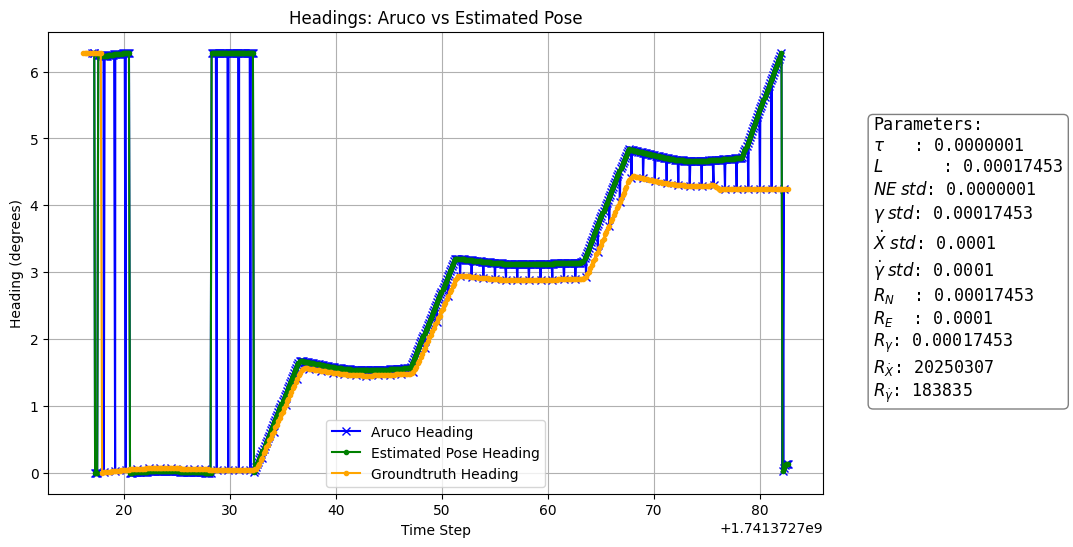

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_0.0000001_0.00017453_0.0000001_0.00017453_0.0001_0.0001_0.00017453_0.0001_0.00017453_20250307_184307_log.json
RMSE Northings: 0.11666992654403857, Sum northings: 53.53305790756362
RMSE Northings: 0.129655805357462, sum eastings: 107.69977844748544
RMSE Northings: 1.7637177757143712, sum headings: 596.0060250443034


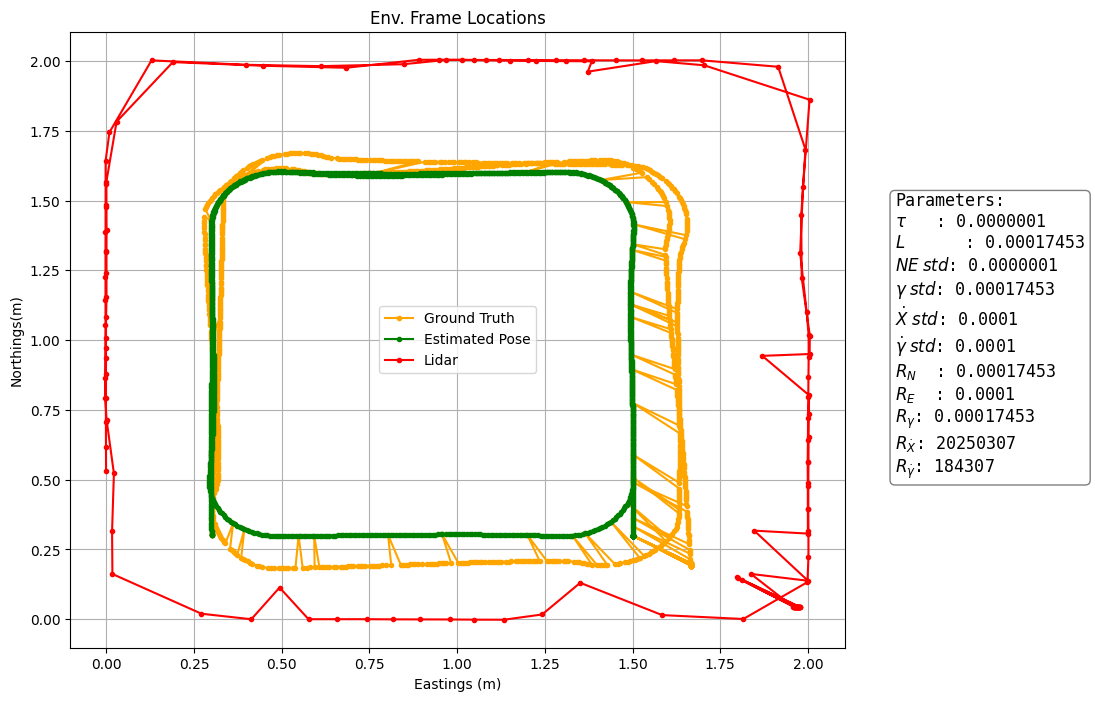

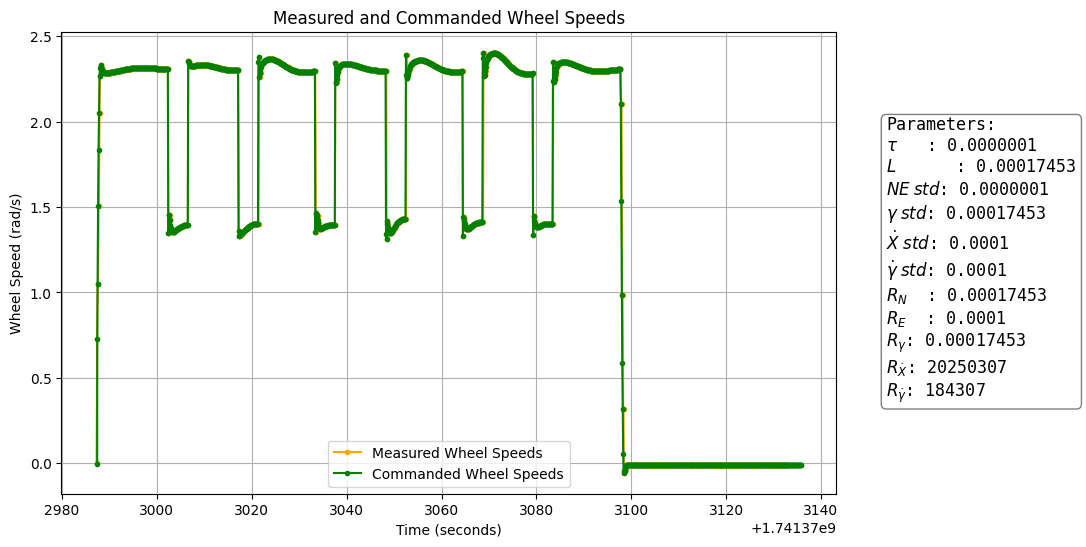

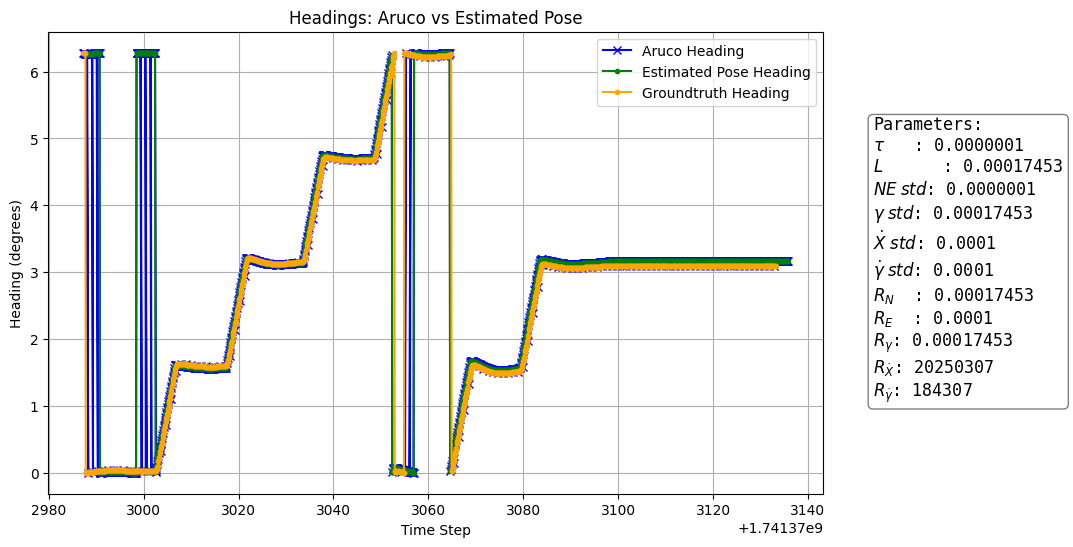

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_0.0000001_0.00017453_0.0000001_0.00017453_1000000_1000000_17453.29251994_1000000_17453.29251994_20250307_183359_log.json
RMSE Northings: 0.09257599205888062, Sum northings: 105.6068401884643
RMSE Northings: 0.15158291853656097, sum eastings: 170.67921869912112
RMSE Northings: 1.847222722116523, sum headings: 910.9823159110751


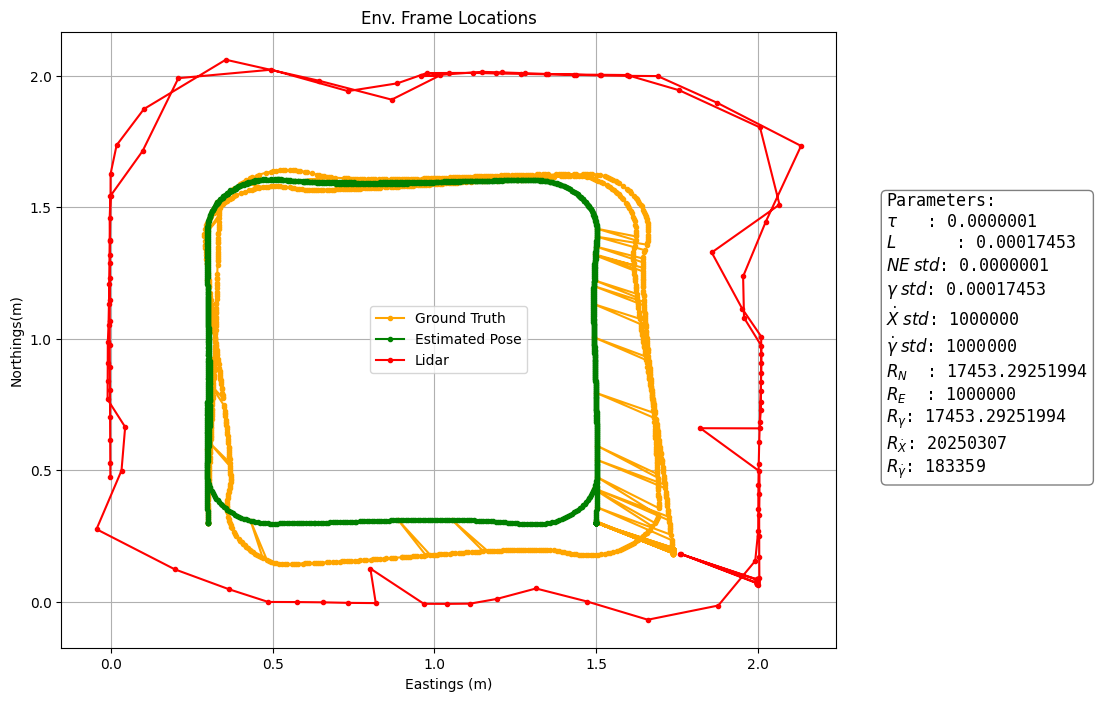

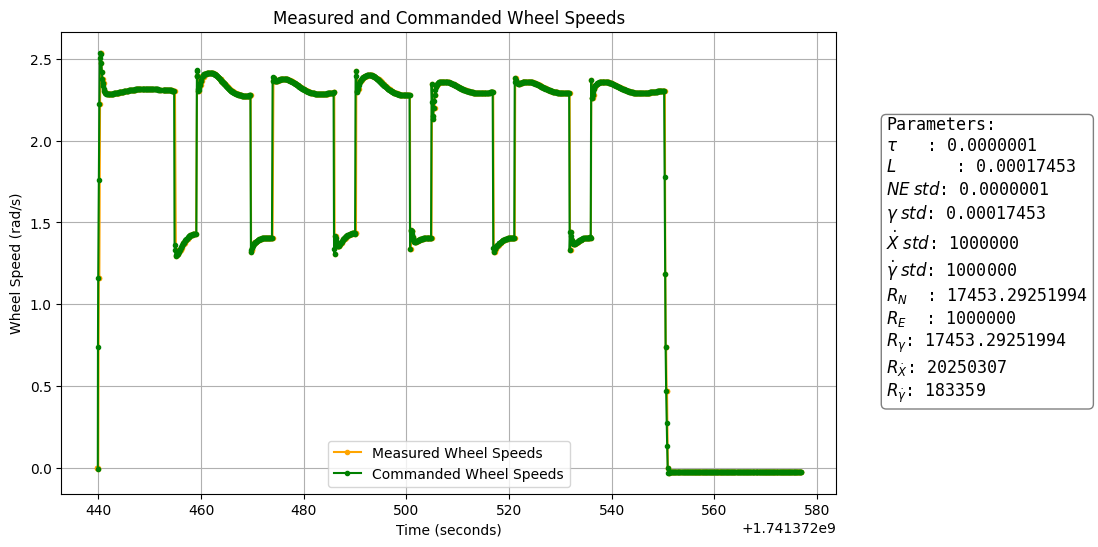

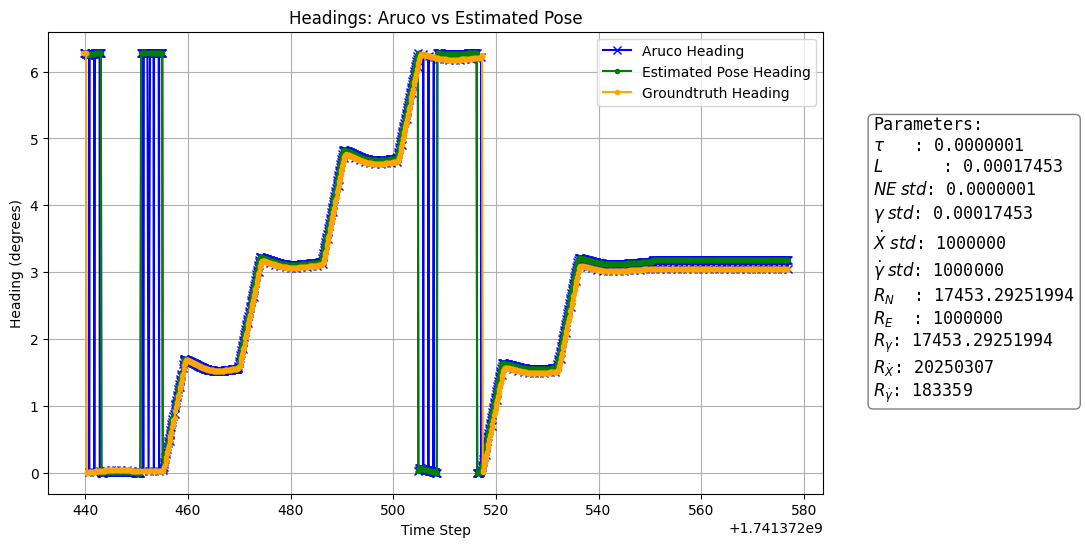

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_0.0000001_0.00017453_0.0000001_0.00017453_1000000_1000000_17453.29251994_1000000_17453.29251994_20250307_184022_log.json
RMSE Northings: 0.09485359726065902, Sum northings: 105.6068401884643
RMSE Northings: 0.1381381066532654, sum eastings: 170.67921869912112
RMSE Northings: 1.9813638371230107, sum headings: 910.9823159110751


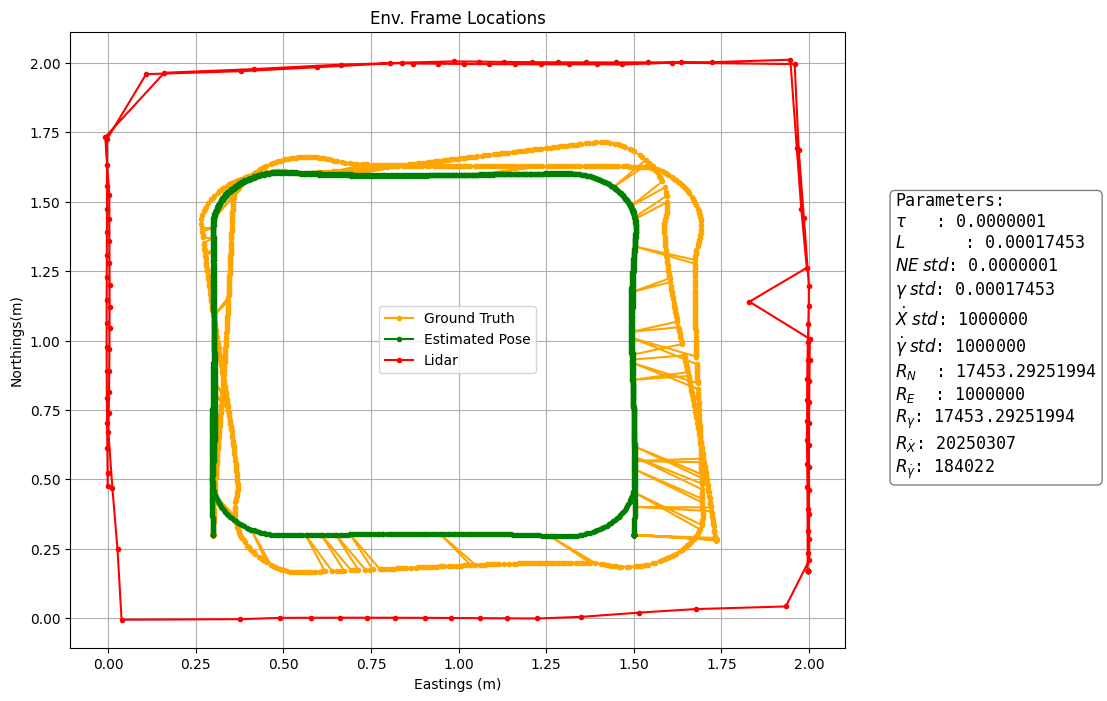

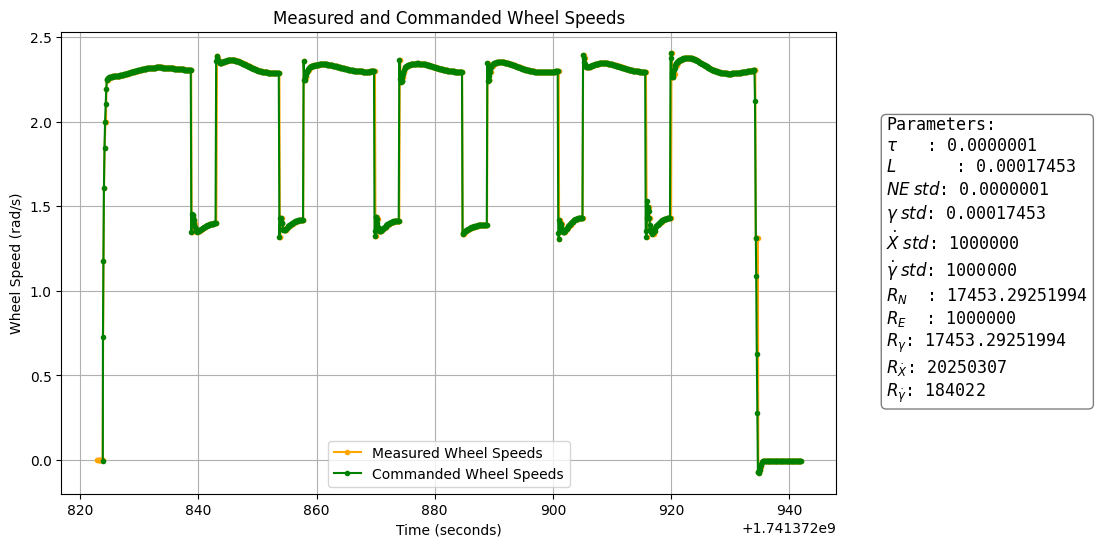

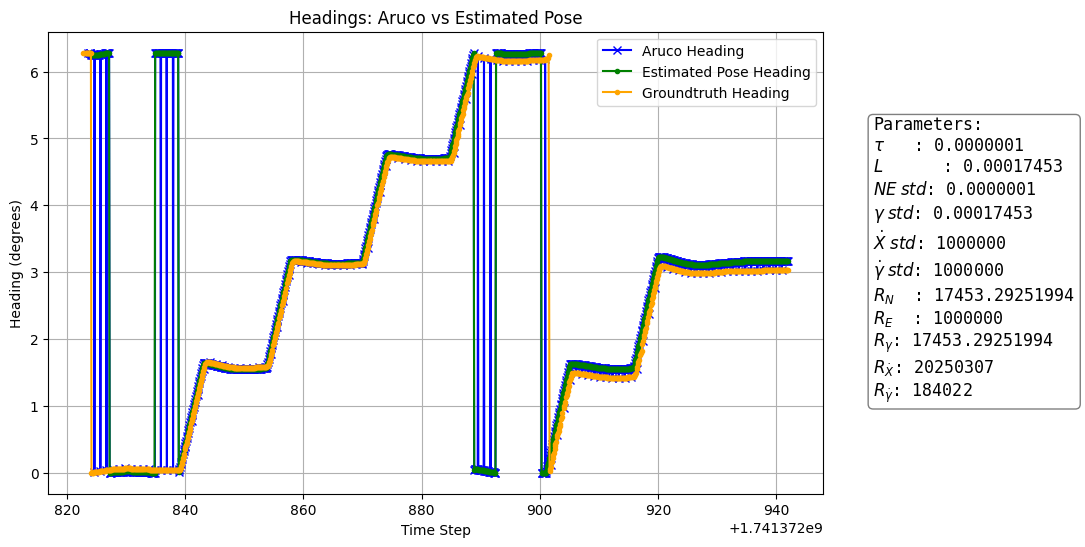

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_0.0000001_0_0.0000001_0_1000000_1000000_17453.29251994_1000000_17453.29251994_20250307_182532_log.json
RMSE Northings: 0.09709120254606157, Sum northings: 105.6068401884643
RMSE Northings: 0.15898417820063343, sum eastings: 170.67921869912112
RMSE Northings: 1.8302598335021434, sum headings: 910.9823159110751


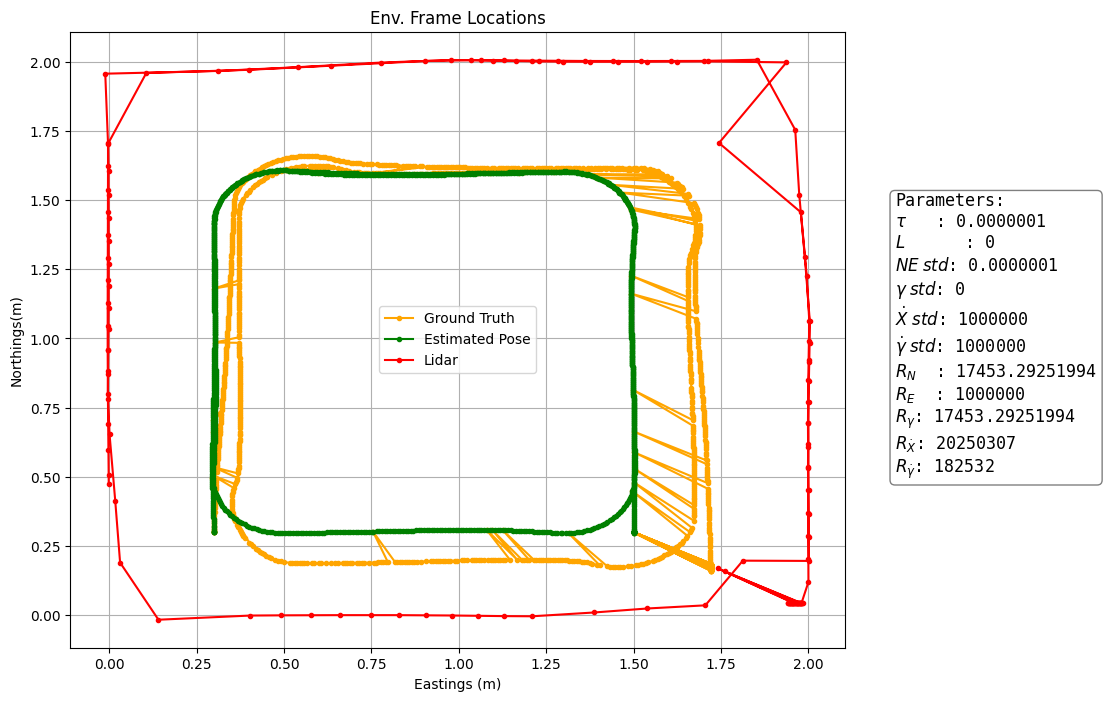

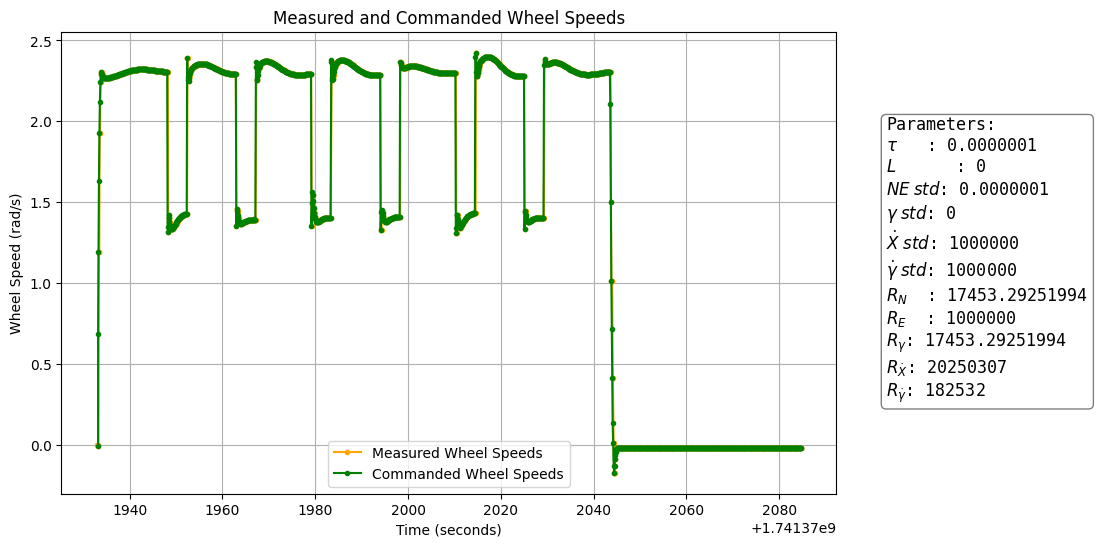

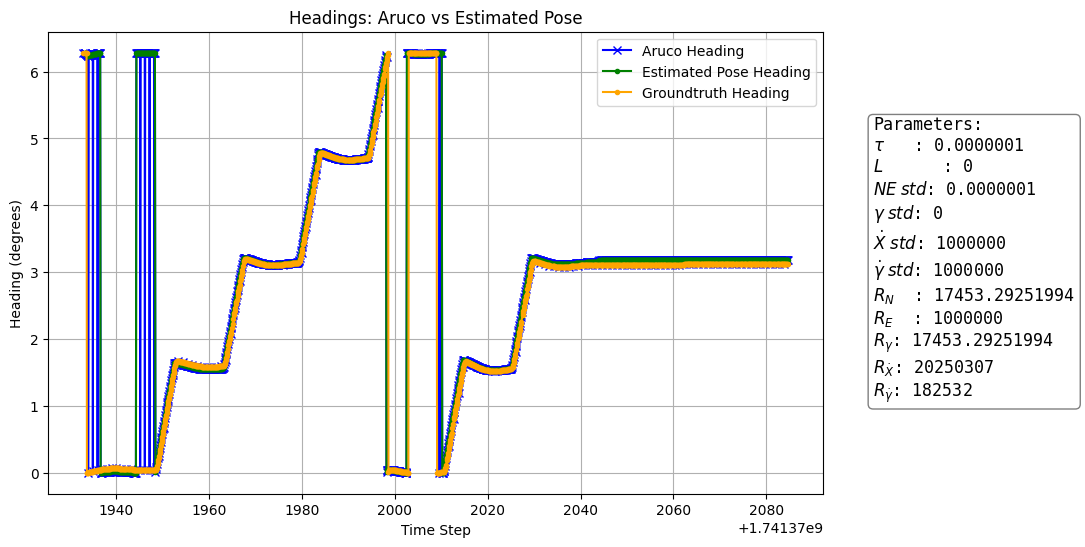

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_1000000_17453.29251994_1000000_17453.29251994_0.0001_0.0001_0.00017453_0.0001_0.00017453_20250307_200149_log.json
RMSE Northings: 0.08426611921797814, Sum northings: 105.6068401884643
RMSE Northings: 0.12293932814941165, sum eastings: 170.67921869912112
RMSE Northings: 1.7533828665317832, sum headings: 910.9823159110751


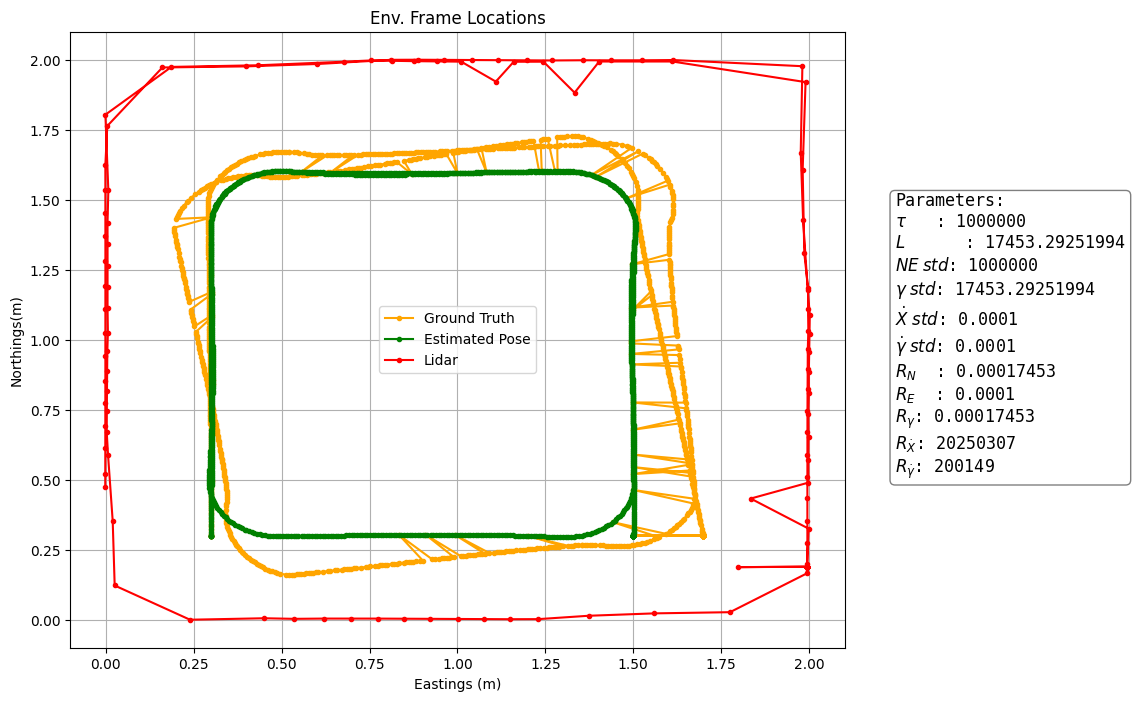

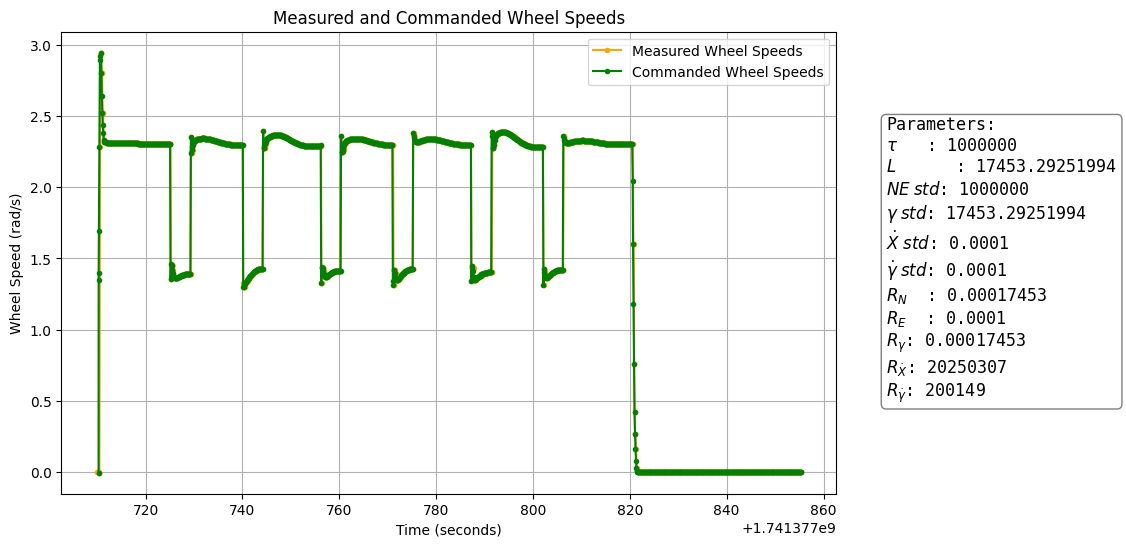

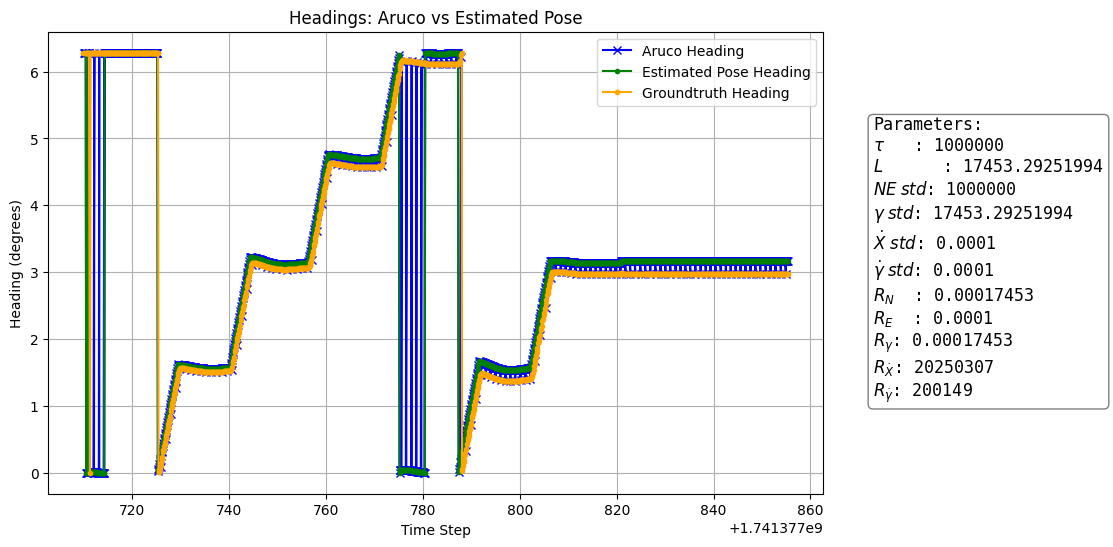

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_1000000_17453.29251994_1000000_17453.29251994_1000000_1000000_17453.29251994_1000000_17453.29251994_20250307_170911_log.json
RMSE Northings: 0.13220573973004068, Sum northings: 105.6068401884643
RMSE Northings: 0.20100088705503544, sum eastings: 170.67921869912112
RMSE Northings: 1.741999327358345, sum headings: 910.9823159110751


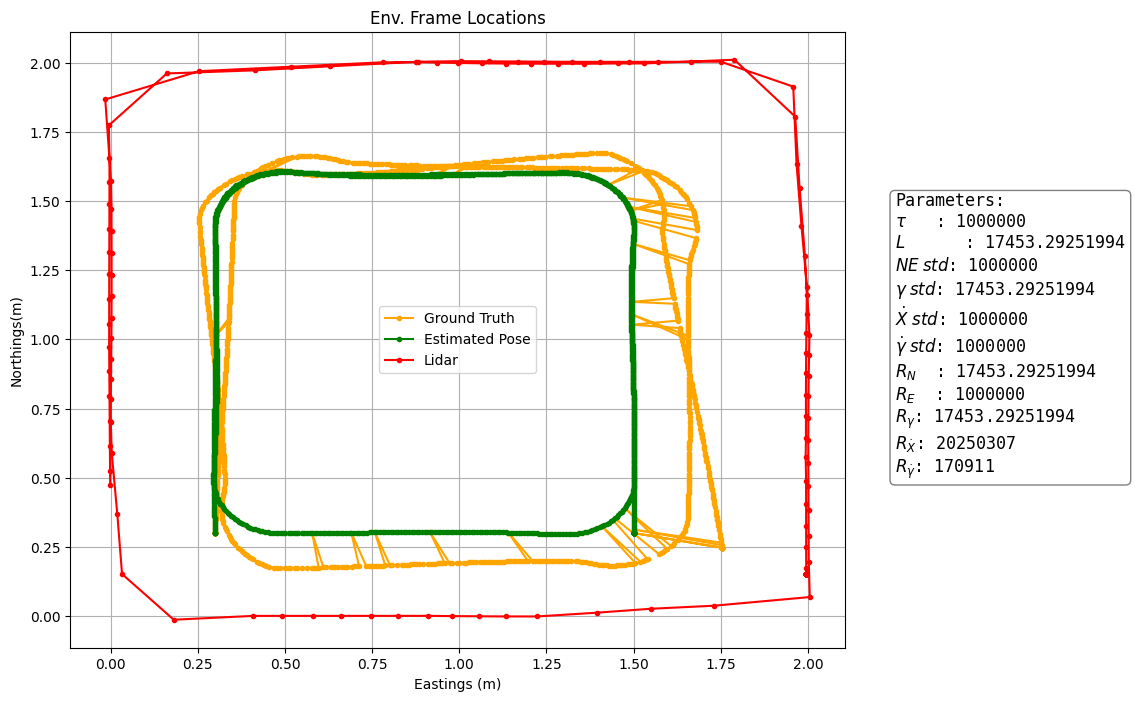

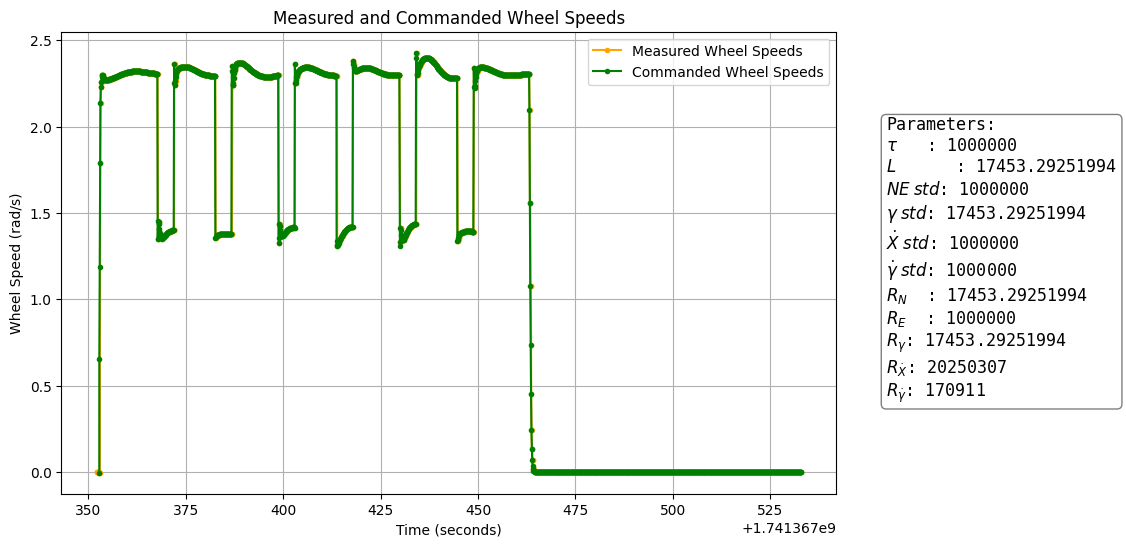

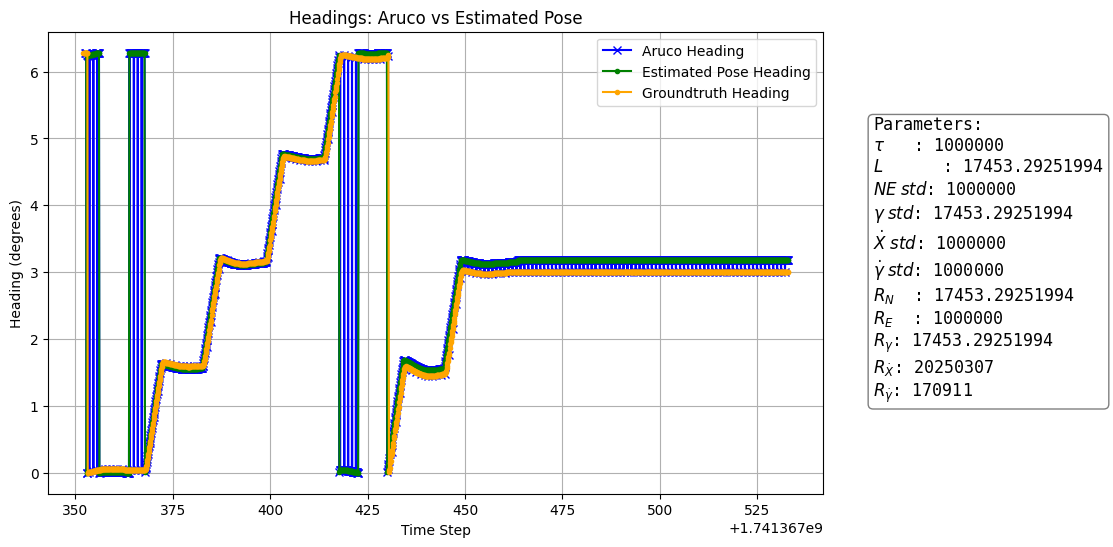

Processing file: .venv\uos_feeg6043_build\src\logs\0.4_0.25_1000000_17453.29251994_1000000_17453.29251994_1000000_1000000_17453.29251994_1000000_17453.29251994_20250307_184831_log.json
RMSE Northings: 0.060371906799638934, Sum northings: 105.6068401884643
RMSE Northings: 0.1121901607824693, sum eastings: 170.67921869912112
RMSE Northings: 1.9208251896584942, sum headings: 910.9823159110751


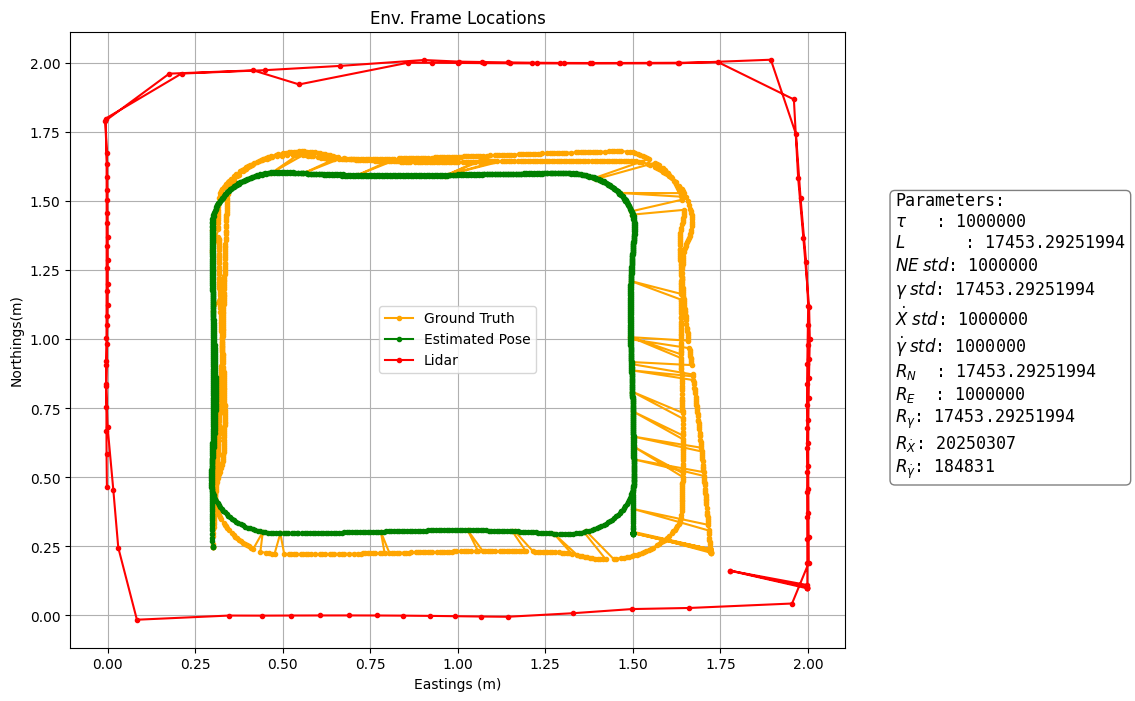

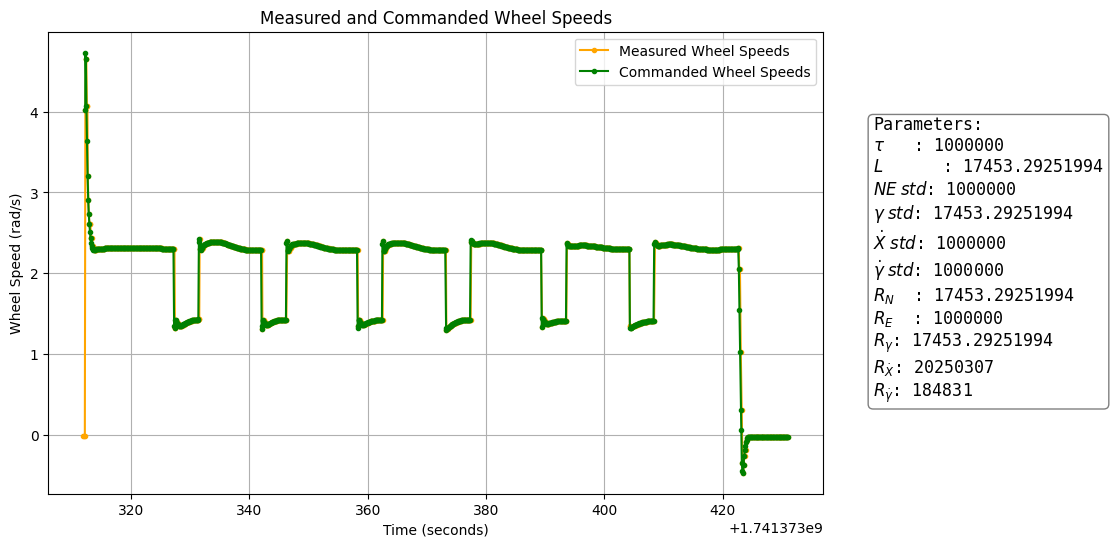

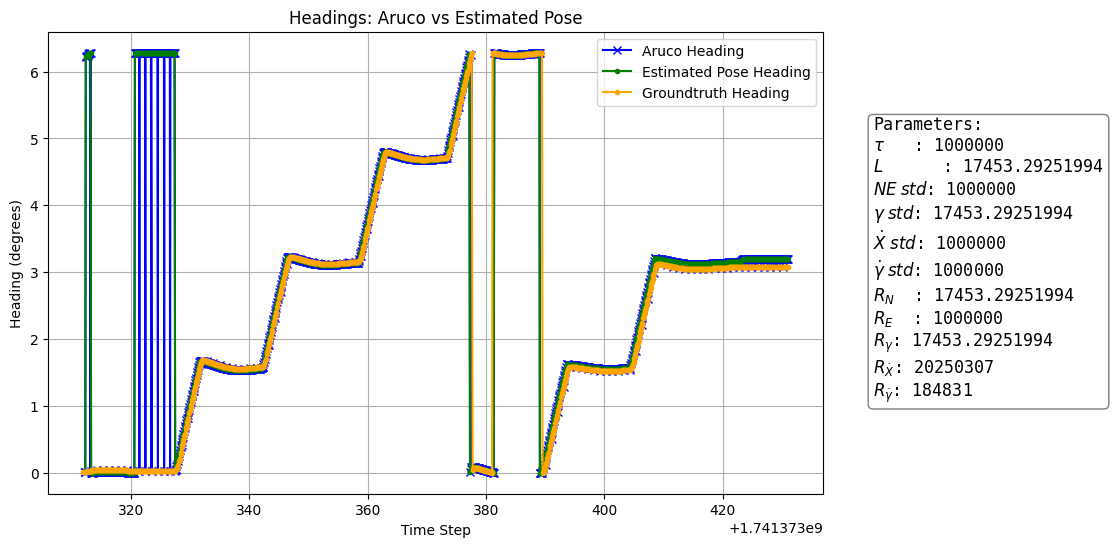

Processing file: .venv\uos_feeg6043_build\src\logs\20250217_112415_log.json


ValueError: could not convert string to float: 'log.json'

In [336]:
import math
for log_file in os.listdir(r'.venv\uos_feeg6043_build\src\logs'):
    log_file_path = os.path.join(r'.venv\uos_feeg6043_build\src\logs', log_file)
    print(f"Processing file: {log_file_path}")
        
    data_by_topic = parse_json_file(log_file_path)
    # for topic, items in data_by_topic.items():
        # print(f"{topic}: {len(items)} entries")

    params_dict = extract_parameters_from_filename(log_file_path)
    df_params = pd.DataFrame(list(params_dict.items()), columns=['Parameter', 'Value'])

    topic_to_check = '/groundtruth'

    if topic_to_check in data_by_topic:
        # print(f"Topic '{topic_to_check}' exists!")    
        simulation_flag = True
    else:
        # print(f"Topic '{topic_to_check}' does not exist.")
        simulation_flag = False
    # To extract heading from quaternion (orientation)
    def quaternion_to_euler(w, x, y, z):
        """Convert quaternion (w, x, y, z) to Euler angles (roll, pitch, yaw)."""
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
        
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
        
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
        
        return roll_x, pitch_y, yaw_z

    # For /est_pose (same structure as /aruco)
    est_pose_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/est_pose']]
    est_pose_northings = [item['message']['pose']['position']['x'] for item in data_by_topic['/est_pose']]
    est_pose_eastings = [item['message']['pose']['position']['y'] for item in data_by_topic['/est_pose']]
    est_pose_headings = [(quaternion_to_euler(item['message']['pose']['orientation']['w'], 
                                            item['message']['pose']['orientation']['x'], 
                                            item['message']['pose']['orientation']['y'], 
                                            item['message']['pose']['orientation']['z'])[2])% (2*np.pi)
                        for item in data_by_topic['/est_pose']]


    # Wheel speeds
    true_wheel_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/true_wheel_speeds']]
    true_wheel_speeds = [item['message']['vector']['x'] for item in data_by_topic['/true_wheel_speeds']]
    wheel_speeds_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/wheel_speeds_cmd']]
    wheel_speeds_cmd = [item['message']['vector']['x'] for item in data_by_topic['/wheel_speeds_cmd']]

    # Extract ArUco data northings, eastings, and heading
    aruco_timestamps = [(item['message']['header']['stamp']) for item in data_by_topic['/aruco']]
    aruco_northings = [item['message']['pose']['position']['x'] for item in data_by_topic['/aruco']]
    aruco_eastings = [item['message']['pose']['position']['y'] for item in data_by_topic['/aruco']]

    lidar_timestamps = [(item['message']['header']['stamp']) for item in data_by_topic['/lidar']]
    lidar_ranges = [item['message']['ranges'] for item in data_by_topic['/lidar']]
    lidar_intensities = [item['message']['intensities'] for item in data_by_topic['/lidar']]
    lidar_angles = [item['message']['angles'] for item in data_by_topic['/lidar']]


    aruco_headings = [(quaternion_to_euler(item['message']['pose']['orientation']['w'], 
                                        item['message']['pose']['orientation']['x'], 
                                        item['message']['pose']['orientation']['y'], 
                                        item['message']['pose']['orientation']['z'])[2]) % (2*np.pi)
                    for item in data_by_topic['/aruco']]

    # Extract simulation ground truth data northings, eastings
    if simulation_flag == True:
        groundtruth_timestamps = [float(item['timestamp']) for item in data_by_topic['/groundtruth']]
        groundtruth_northings = [item['message']['position']['x'] for item in data_by_topic['/groundtruth']]
        groundtruth_eastings = [item['message']['position']['y'] for item in data_by_topic['/groundtruth']]
        
        groundtruth_headings = [(quaternion_to_euler(item['message']['orientation']['w'], 
                                                    item['message']['orientation']['x'], 
                                                    item['message']['orientation']['y'], 
                                                    item['message']['orientation']['z'])[2]) % (2*np.pi)  # Extract the yaw (heading)
                                for item in data_by_topic['/groundtruth']
        ]

    else:
        df = pd.read_csv(aruco_path)    
        start_time = np.min(est_pose_timestamps)
        end_time = np.max(est_pose_timestamps)
        filtered_data = df.loc[(df['epoch [s]'] >= start_time) & (df['epoch [s]'] <= end_time)]
        params_dict = extract_parameters_from_filename(filename)
        for param, value in params_dict.items():
            filtered_data[param] = value

        groundtruth_timestamps = filtered_data['epoch [s]']
        groundtruth_northings = filtered_data['x [m]']
        groundtruth_eastings = filtered_data['y [m]']
        groundtruth_headings = np.deg2rad(filtered_data['yaw [deg]'] % (360))


    def match_timestamps(groundtruth_timestamps, lidar_timestamps, tolerance=0.1):
        matched_indices = []
        for lidar_ts in lidar_timestamps:
            closest_index = min(range(len(groundtruth_timestamps)), key=lambda i: abs(groundtruth_timestamps[i] - lidar_ts))
            if abs(groundtruth_timestamps[closest_index] - lidar_ts) <= tolerance:
                matched_indices.append(closest_index)
        return matched_indices

    # Example usage
    matched_indices = match_timestamps(groundtruth_timestamps, lidar_timestamps)
    matched_groundtruth_timestamps = [groundtruth_timestamps[i] for i in matched_indices]

    lidar_eastings = []
    lidar_northings = []
    lidar_angles = [angle[0] % (np.pi*2) for angle in lidar_angles]

    for i, timestamp in enumerate(matched_groundtruth_timestamps):
        index = matched_indices[i]
        
        try:
            lidar_eastings.append(groundtruth_eastings[index] + lidar_ranges[i][0] * np.sin(groundtruth_headings[index] + lidar_angles[i]))
            lidar_northings.append(groundtruth_northings[index] + lidar_ranges[i][0] * np.cos(groundtruth_headings[index] + lidar_angles[i]))
        except IndexError:
            break

    # # Smooth the lidar ranges using a simple moving average
    # def moving_average(data, window_size):
    #     return np.convolve(data, np.ones(window_size)/window_size, mode='same')

    # lidar_eastings = [moving_average(ranges, 5) for ranges in lidar_eastings]
    # lidar_northings = [moving_average(ranges, 5) for ranges in lidar_northings]
    
    if len(groundtruth_northings) > len(est_pose_northings):
        interp_func = interp1d(np.linspace(0, 1, len(est_pose_northings)), est_pose_northings, kind='linear', fill_value="extrapolate")
        est_pose_northings_interp = interp_func(np.linspace(0, 1, len(groundtruth_northings)))
        rmse_northings = np.sqrt(np.mean((np.array(groundtruth_northings) - est_pose_northings_interp)**2))
    else:
        interp_func = interp1d(np.linspace(0, 1, len(groundtruth_northings)), groundtruth_northings, kind='linear', fill_value="extrapolate")
        groundtruth_northings_interp = interp_func(np.linspace(0, 1, len(est_pose_northings)))
        rmse_northings = np.sqrt(np.mean((groundtruth_northings_interp - np.array(est_pose_northings))**2))
        sum_diff_northings = np.sum(np.abs(groundtruth_northings_interp - np.array(est_pose_northings)))

    if len(groundtruth_eastings) > len(est_pose_eastings):
        interp_func = interp1d(np.linspace(0, 1, len(est_pose_eastings)), est_pose_eastings, kind='linear', fill_value="extrapolate")
        est_pose_eastings_interp = interp_func(np.linspace(0, 1, len(groundtruth_eastings)))
        rmse_eastings = np.sqrt(np.mean((np.array(groundtruth_eastings) - est_pose_eastings_interp)**2))
    else:
        interp_func = interp1d(np.linspace(0, 1, len(groundtruth_eastings)), groundtruth_eastings, kind='linear', fill_value="extrapolate")
        groundtruth_eastings_interp = interp_func(np.linspace(0, 1, len(est_pose_eastings)))
        rmse_eastings = np.sqrt(np.mean((groundtruth_eastings_interp - np.array(est_pose_eastings))**2))
        sum_diff_eastings = np.sum(np.abs(groundtruth_eastings_interp - np.array(est_pose_eastings)))

    if len(groundtruth_headings) > len(est_pose_headings):  
        interp_func = interp1d(np.linspace(0, 1, len(est_pose_headings)), est_pose_headings, kind='linear', fill_value="extrapolate")
        est_pose_headings_interp = interp_func(np.linspace(0, 1, len(groundtruth_headings)))
        rmse_headings = np.sqrt(np.mean((np.array(groundtruth_headings) - est_pose_headings_interp)**2))
    else:
        interp_func = interp1d(np.linspace(0, 1, len(groundtruth_headings)), groundtruth_headings, kind='linear', fill_value="extrapolate")
        groundtruth_headings_interp = interp_func(np.linspace(0, 1, len(est_pose_headings)))
        rmse_headings = np.sqrt(np.mean((groundtruth_headings_interp - np.array(est_pose_headings))**2))
        sum_diff_headings = np.sum(np.abs(groundtruth_headings_interp - np.array(est_pose_headings)))

    print(f"RMSE Northings: {rmse_northings}, Sum northings: {sum_diff_northings}")
    print(f"RMSE Northings: {rmse_eastings}, sum eastings: {sum_diff_eastings}")
    print(f"RMSE Northings: {rmse_headings}, sum headings: {sum_diff_headings}")


    plt.figure(figsize=(10, 8))
    # plt.scatter(aruco_eastings, aruco_northings, label="Aruco", marker="x", color="blue")
    plt.plot(groundtruth_eastings, groundtruth_northings, label="Ground Truth", marker=".", color="orange")
    plt.plot(est_pose_eastings, est_pose_northings, label="Estimated Pose", marker=".", color="green")
    plt.plot(lidar_eastings, lidar_northings, label="Lidar", marker=".", color="red")


    max_len = 9
    textstr = '\n'.join([f'{key: <{max_len}}: {value}' for key, value in params_dict.items()])
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.gcf().text(0.95, 0.5, "Parameters:\n" + textstr, fontsize=12, verticalalignment='center', bbox=props, fontfamily='monospace')

    plt.xlabel("Eastings (m)")
    plt.ylabel("Northings(m)")
    plt.legend()
    plt.title("Env. Frame Locations")
    plt.grid()
    plt.show()

    # Extract timestamps fpr wheel speeds
    true_wheel_speeds_timestamps = [entry['timestamp'] for entry in data_by_topic['/true_wheel_speeds']]
    wheel_speeds_cmd_timestamps = [entry['timestamp'] for entry in data_by_topic['/wheel_speeds_cmd']]

    # Ensure timestamps are float
    true_wheel_speeds_timestamps = [float(ts) for ts in true_wheel_speeds_timestamps]
    wheel_speeds_cmd_timestamps = [float(ts) for ts in wheel_speeds_cmd_timestamps]

    plt.figure(figsize=(10, 6))

    plt.plot(true_wheel_speeds_timestamps, true_wheel_speeds, label="Measured Wheel Speeds", marker=".", color="orange")
    plt.plot(wheel_speeds_cmd_timestamps, wheel_speeds_cmd, label="Commanded Wheel Speeds", marker=".", color="green")

    max_len = 9
    textstr = '\n'.join([f'{key: <{max_len}}: {value}' for key, value in params_dict.items()])
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.gcf().text(0.95, 0.5, "Parameters:\n" + textstr, fontsize=12, verticalalignment='center', bbox=props, fontfamily='monospace')

    plt.xlabel("Time (seconds)")
    plt.ylabel("Wheel Speed (rad/s)")
    plt.legend()
    plt.title("Measured and Commanded Wheel Speeds")
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(aruco_timestamps, aruco_headings, label="Aruco Heading", marker="x", color="blue")
    plt.plot(est_pose_timestamps, est_pose_headings, label="Estimated Pose Heading", marker=".", color="green")
    plt.plot(groundtruth_timestamps, groundtruth_headings, label="Groundtruth Heading", marker=".", color="orange")

    max_len = 9
    textstr = '\n'.join([f'{key: <{max_len}}: {value}' for key, value in params_dict.items()])
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.gcf().text(0.95, 0.5, "Parameters:\n" + textstr, fontsize=12, verticalalignment='center', bbox=props, fontfamily='monospace')

    plt.xlabel("Time Step")
    plt.ylabel("Heading (degrees)")
    plt.legend()
    plt.title("Headings: Aruco vs Estimated Pose")
    plt.grid()
    plt.show()


decouple aruco with processed noise 
lidar plot 
write about how to set up study

Processing file: 20250304_141001_log.json
/aruco: 10 entries
/est_pose: 108 entries
/wheel_speeds_cmd: 108 entries
Topic '/groundtruth' does not exist.


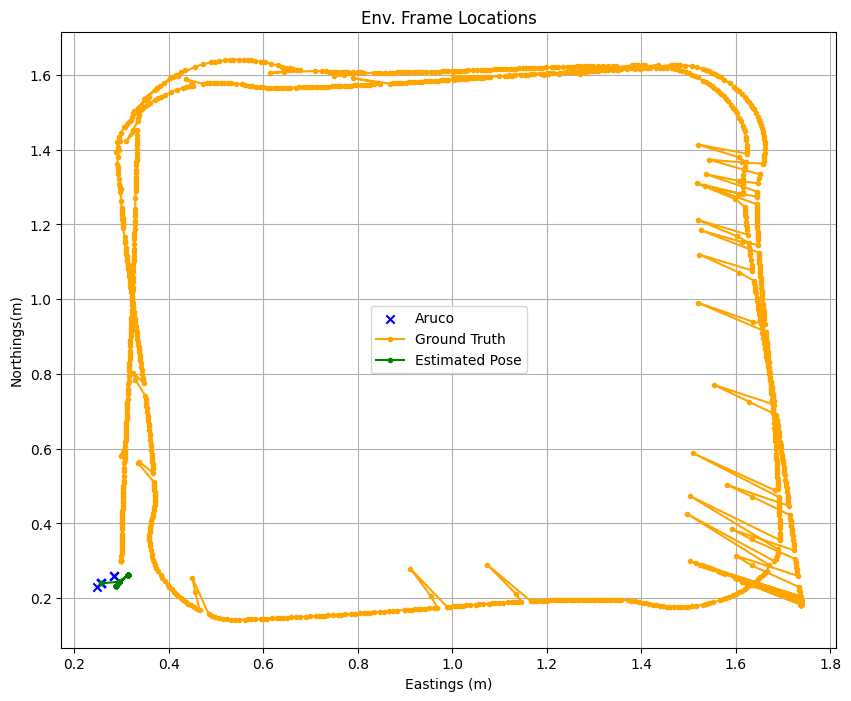

<Figure size 1000x600 with 0 Axes>

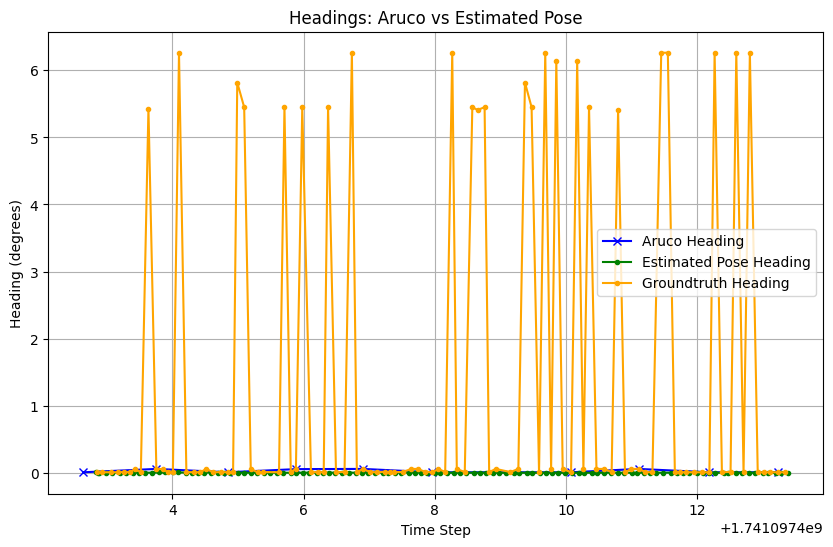

Processing file: 20250304_141124_log.json
/aruco: 10 entries
/est_pose: 106 entries
/wheel_speeds_cmd: 106 entries
Topic '/groundtruth' does not exist.


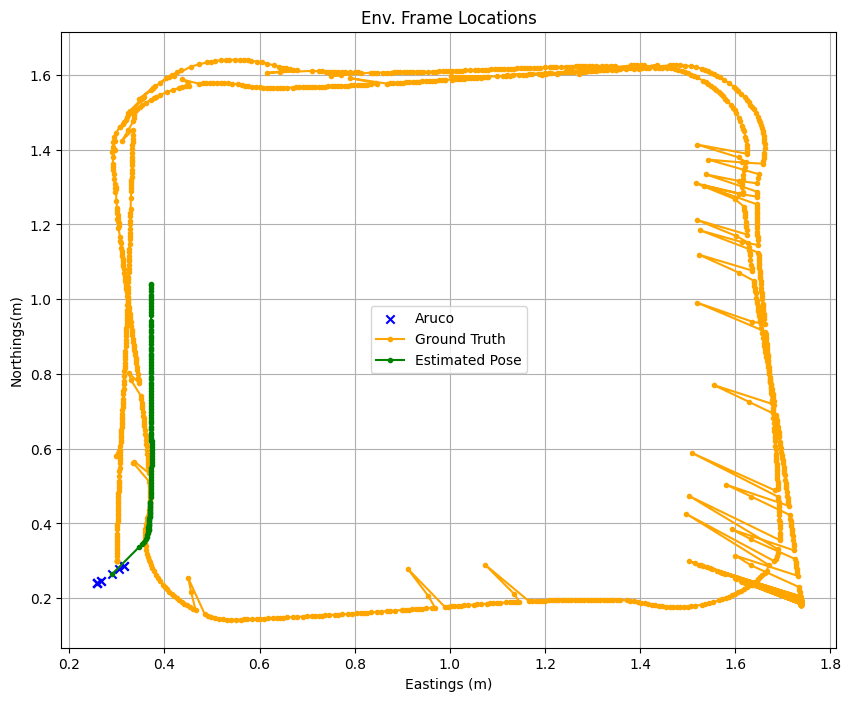

<Figure size 1000x600 with 0 Axes>

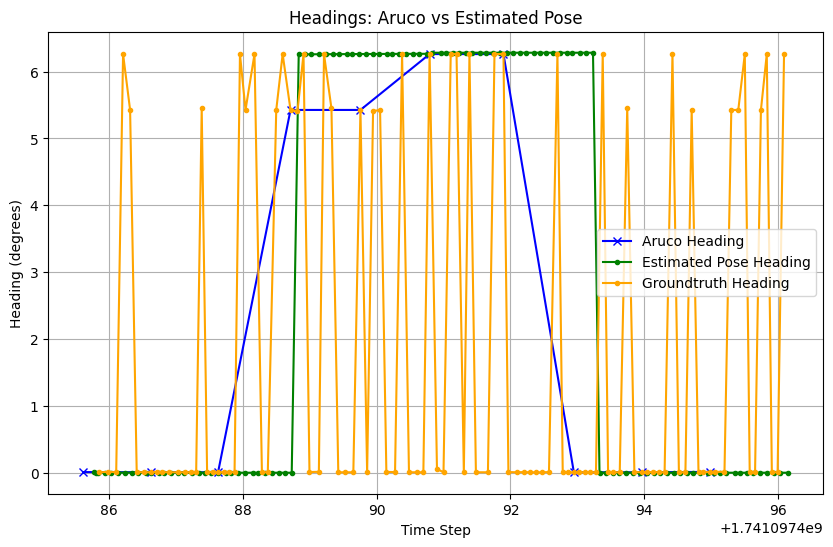

Processing file: 20250304_141156_log.json
/aruco: 7 entries
/est_pose: 100 entries
/wheel_speeds_cmd: 100 entries
Topic '/groundtruth' does not exist.


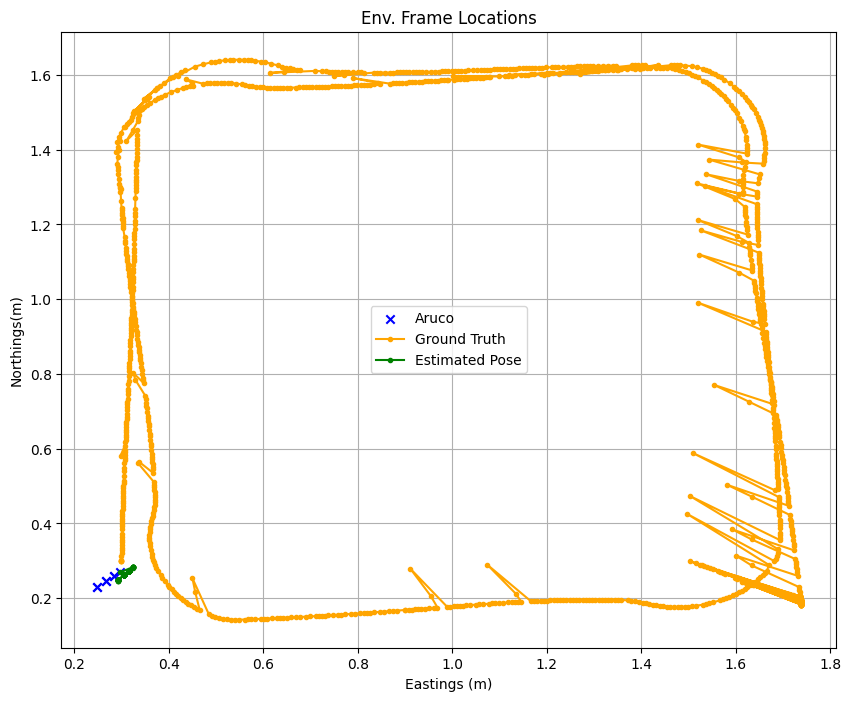

<Figure size 1000x600 with 0 Axes>

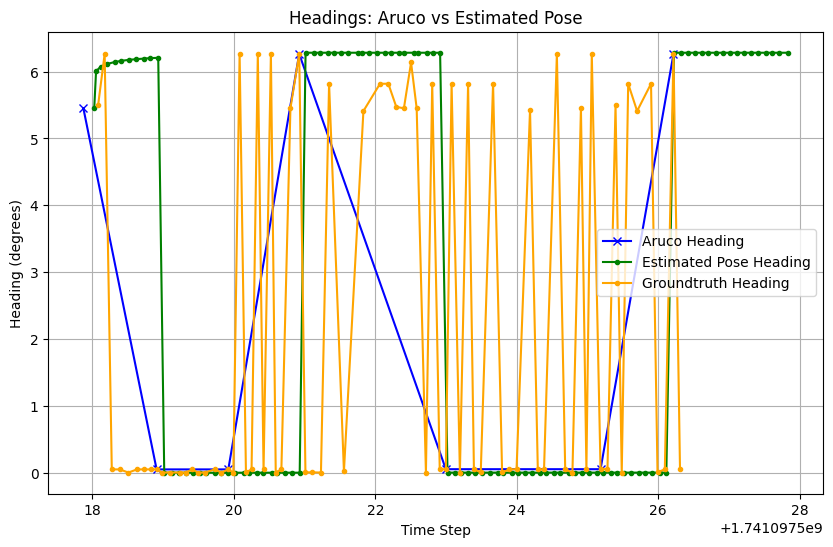

Processing file: 20250304_141340_log.json
/aruco: 13 entries
/est_pose: 150 entries
/wheel_speeds_cmd: 150 entries
/true_wheel_speeds: 63 entries
/lidar: 6 entries
Topic '/groundtruth' does not exist.


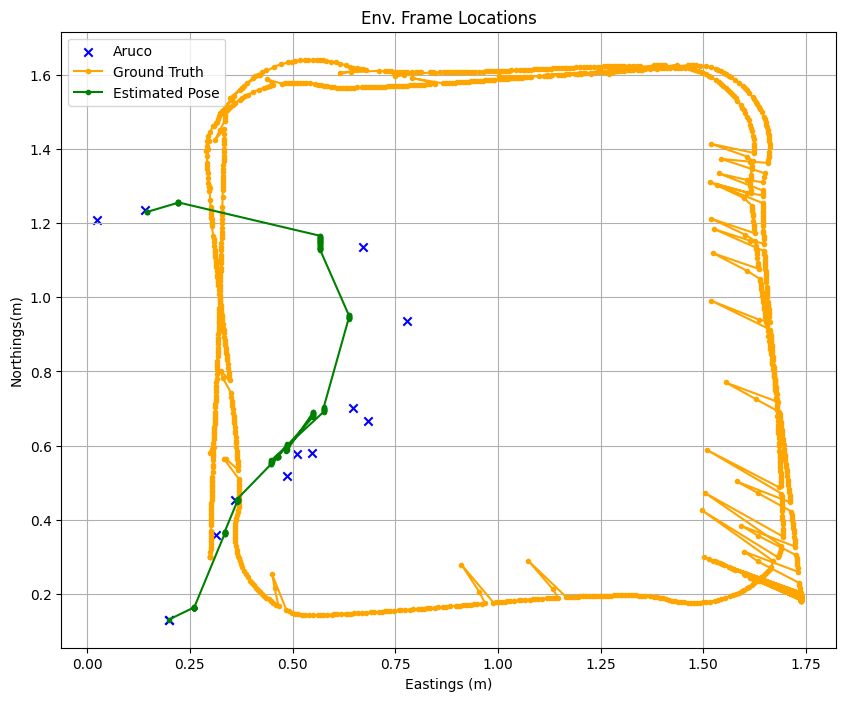

<Figure size 1000x600 with 0 Axes>

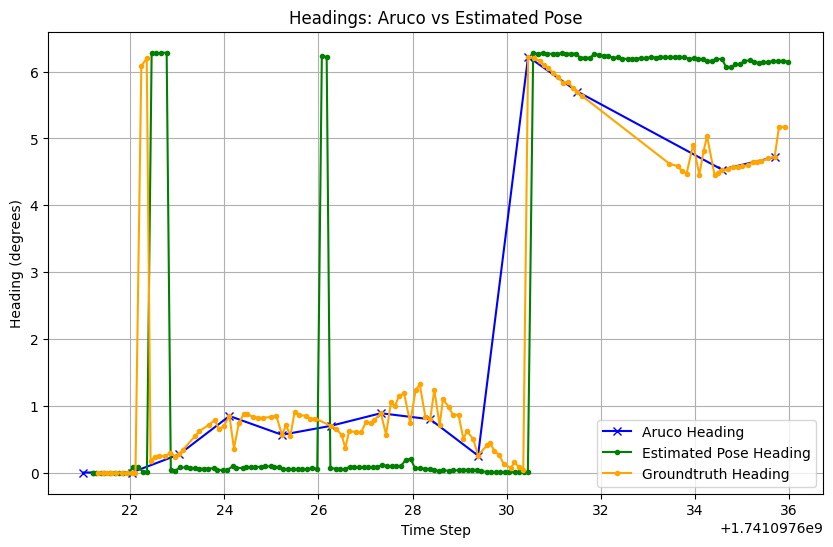

Processing file: 20250304_141517_log.json
/aruco: 5 entries
/est_pose: 67 entries
/wheel_speeds_cmd: 67 entries
/true_wheel_speeds: 7 entries
/lidar: 1 entries
Topic '/groundtruth' does not exist.


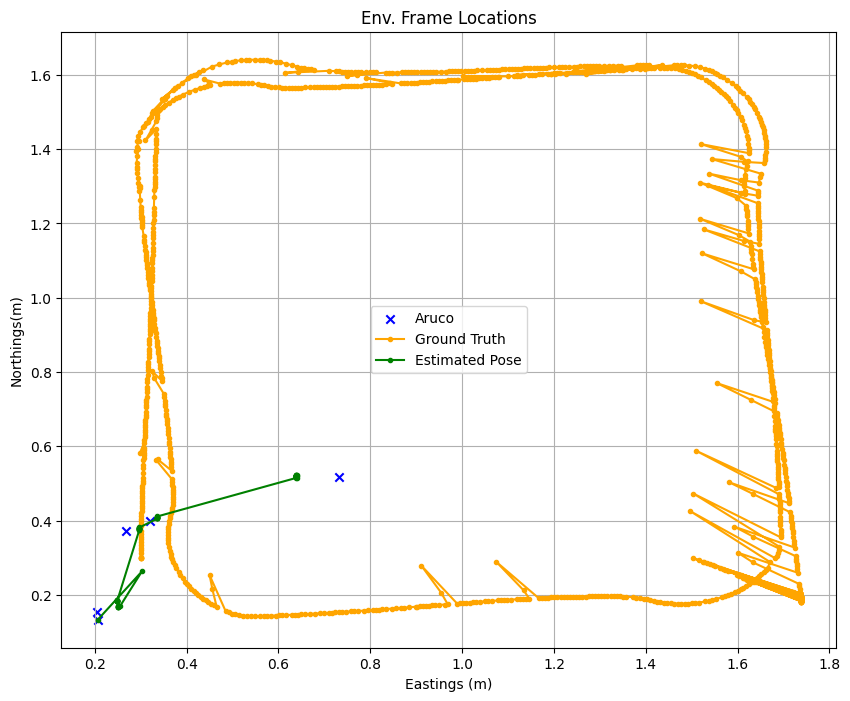

<Figure size 1000x600 with 0 Axes>

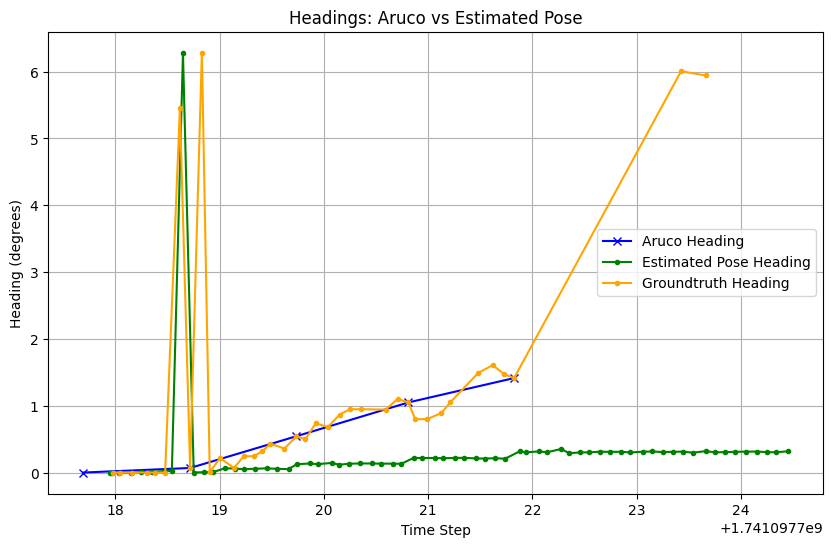

Processing file: 20250304_141542_log.json
/true_wheel_speeds: 32 entries
/aruco: 10 entries
/est_pose: 142 entries
/wheel_speeds_cmd: 142 entries
Topic '/groundtruth' does not exist.


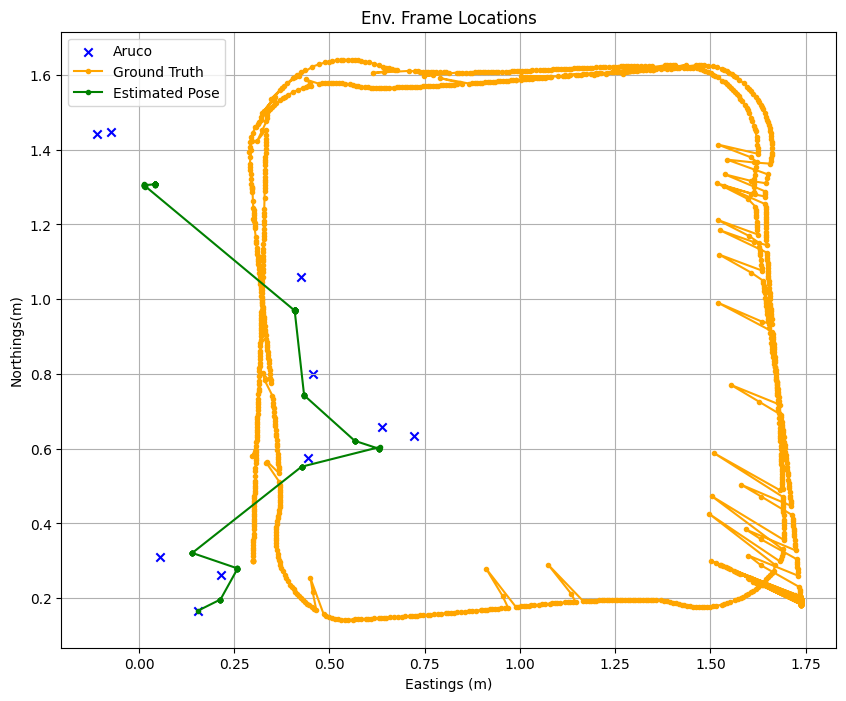

<Figure size 1000x600 with 0 Axes>

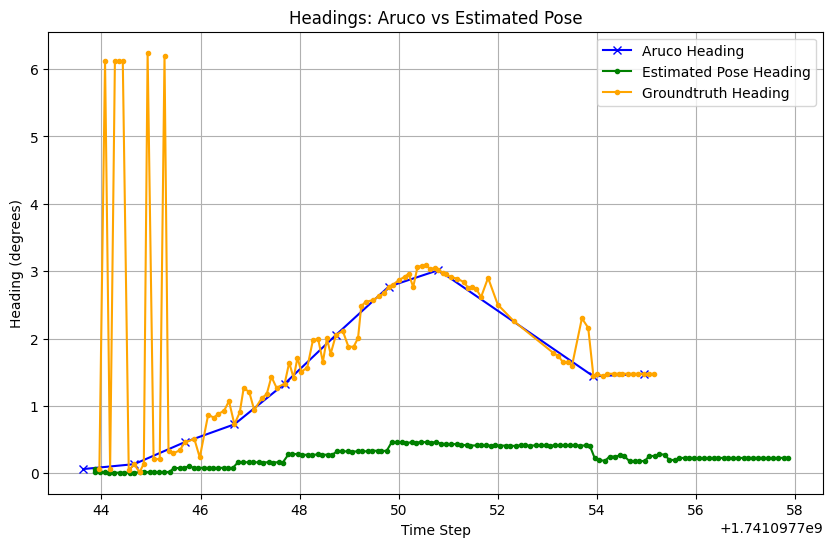

Processing file: 20250304_141745_log.json
/true_wheel_speeds: 135 entries
/aruco: 33 entries
/est_pose: 496 entries
/wheel_speeds_cmd: 496 entries
/lidar: 20 entries
Topic '/groundtruth' does not exist.


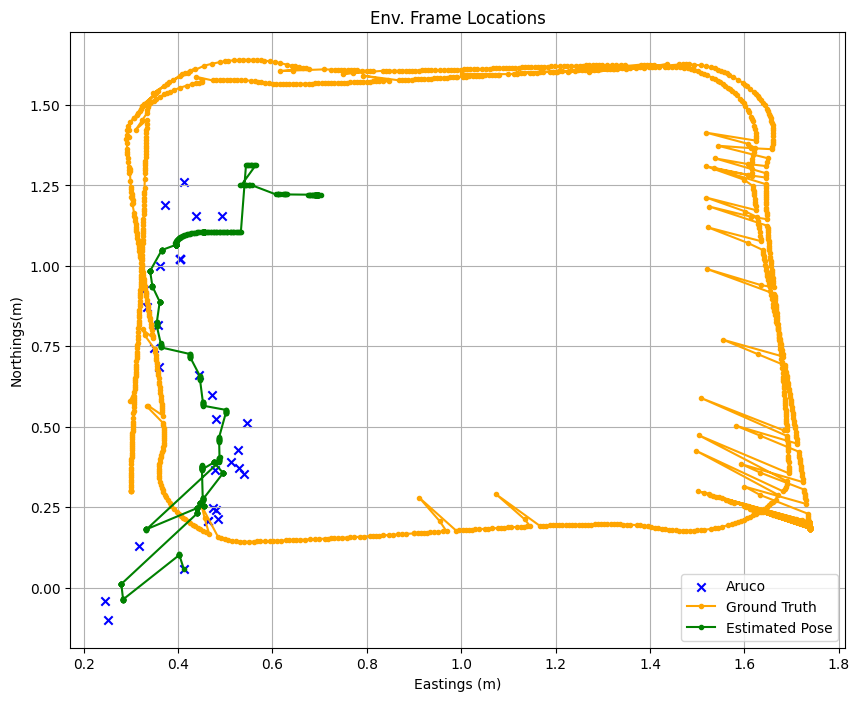

<Figure size 1000x600 with 0 Axes>

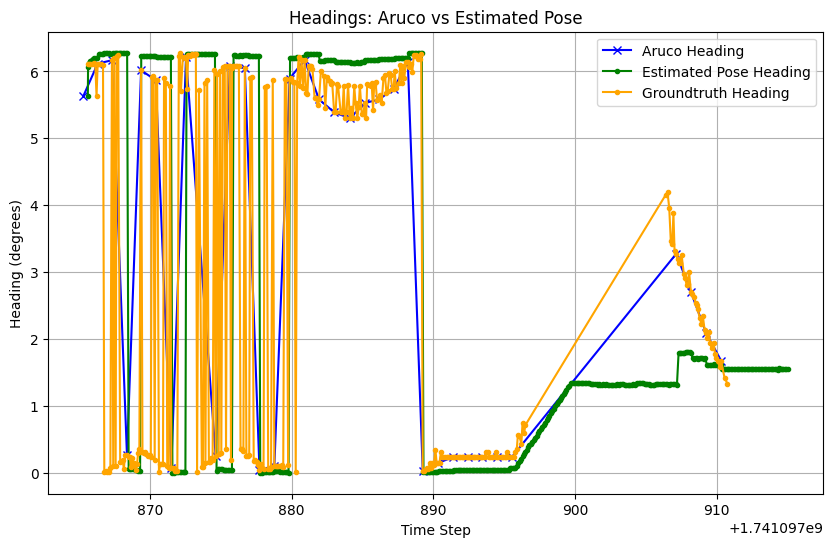

Processing file: 25_Tag_25.csv
Error decoding JSON: Expecting value: line 1 column 1 (char 0)
Error decoding JSON: Extra data: line 1 column 17 (char 16)
Error decoding JSON: Extra data: line 1 column 17 (char 16)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 17 (char 16)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Extra data: line 1 column 17 (char 16)
Error 

KeyError: '/est_pose'

In [ ]:

import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for log_file in os.listdir(r'realtime_log'):
    log_file_path = os.path.join(r'realtime_log', log_file)
    print(f"Processing file: {log_file}")
        
    data_by_topic = parse_json_file(log_file_path)
    for topic, items in data_by_topic.items():
        print(f"{topic}: {len(items)} entries")

    topic_to_check = '/groundtruth'

    if topic_to_check in data_by_topic:
        print(f"Topic '{topic_to_check}' exists!")    
        simulation_flag = True
    else:
        print(f"Topic '{topic_to_check}' does not exist.")
        simulation_flag = False

    # To extract heading from quaternion (orientation)
    def quaternion_to_euler(w, x, y, z):
        """Convert quaternion (w, x, y, z) to Euler angles (roll, pitch, yaw)."""
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
        
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
        
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
        
        return roll_x, pitch_y, yaw_z

    # For /est_pose (same structure as /aruco)

    est_pose_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/est_pose']]
    est_pose_northings = [item['message']['pose']['position']['x'] for item in data_by_topic['/est_pose']]
    est_pose_eastings = [item['message']['pose']['position']['y'] for item in data_by_topic['/est_pose']]
    est_pose_headings = [(quaternion_to_euler(item['message']['pose']['orientation']['w'], 
                                            item['message']['pose']['orientation']['x'], 
                                            item['message']['pose']['orientation']['y'], 
                                            item['message']['pose']['orientation']['z'])[2])% (2*np.pi)
                        for item in data_by_topic['/est_pose']]


    # Wheel speeds
    # true_wheel_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/true_wheel_speeds']]
    # true_wheel_speeds = [item['message']['vector']['x'] for item in data_by_topic['/true_wheel_speeds']]
    
    wheel_speeds_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/wheel_speeds_cmd']]
    wheel_speeds_cmd = [item['message']['vector']['x'] for item in data_by_topic['/wheel_speeds_cmd']]

    # Extract ArUco data northings, eastings, and heading
    aruco_timestamps = [(item['message']['header']['stamp']) for item in data_by_topic['/aruco']]
    aruco_northings = [item['message']['pose']['position']['x'] for item in data_by_topic['/aruco']]
    aruco_eastings = [item['message']['pose']['position']['y'] for item in data_by_topic['/aruco']]

    aruco_headings = [(quaternion_to_euler(item['message']['pose']['orientation']['w'], 
                                        item['message']['pose']['orientation']['x'], 
                                        item['message']['pose']['orientation']['y'], 
                                        item['message']['pose']['orientation']['z'])[2]) % (2*np.pi)
                    for item in data_by_topic['/aruco']]
    
    # Extract simulation ground truth data northings, eastings
    if simulation_flag == True:
        groundtruth_timestamps = [float(item['timestamp']) for item in data_by_topic['/groundtruth']]
        groundtruth_northings = [item['message']['position']['x'] for item in data_by_topic['/groundtruth']]
        groundtruth_eastings = [item['message']['position']['y'] for item in data_by_topic['/groundtruth']]
        
        groundtruth_headings = [(quaternion_to_euler(item['message']['orientation']['w'], 
                                                    item['message']['orientation']['x'], 
                                                    item['message']['orientation']['y'], 
                                                    item['message']['orientation']['z'])[2]) % (2*np.pi)  # Extract the yaw (heading)
                                for item in data_by_topic['/groundtruth']
        ]

    else:
        df = pd.read_csv(aruco_path)    
        start_time = np.min(est_pose_timestamps)
        end_time = np.max(est_pose_timestamps)
        filtered_data = df.loc[(df['epoch [s]'] >= start_time) & (df['epoch [s]'] <= end_time)]

        groundtruth_timestamps = filtered_data['epoch [s]']
        groundtruth_northings = filtered_data['x [m]']
        groundtruth_eastings = filtered_data['y [m]']
        groundtruth_headings = np.deg2rad(filtered_data['yaw [deg]'] % (360))

    plt.figure(figsize=(10, 8))
    plt.scatter(aruco_eastings, aruco_northings, label="Aruco", marker="x", color="blue")
    plt.plot(groundtruth_eastings_interp, groundtruth_northings_interp, label="Ground Truth", marker=".", color="orange")
    plt.plot(est_pose_eastings, est_pose_northings, label="Estimated Pose", marker=".", color="green")

    plt.xlabel("Eastings (m)")
    plt.ylabel("Northings(m)")
    plt.legend()
    plt.title("Env. Frame Locations")
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))

    # plt.plot(true_wheel_speeds_timestamps, true_wheel_speeds, label="Measured Wheel Speeds", marker=".", color="orange")
    # plt.plot(wheel_speeds_cmd_timestamps, wheel_speeds_cmd, label="Commanded Wheel Speeds", marker=".", color="green")


    plt.figure(figsize=(10, 6))
    plt.plot(aruco_timestamps, aruco_headings, label="Aruco Heading", marker="x", color="blue")
    plt.plot(est_pose_timestamps, est_pose_headings, label="Estimated Pose Heading", marker=".", color="green")
    plt.plot(groundtruth_timestamps, groundtruth_headings, label="Groundtruth Heading", marker=".", color="orange")

    plt.xlabel("Time Step")
    plt.ylabel("Heading (degrees)")
    plt.legend()
    plt.title("Headings: Aruco vs Estimated Pose")
    plt.grid()
    plt.show()


In [ ]:
import math
for log_file in os.listdir(r'realtime_log'):
    log_file_path = os.path.join(r'realtime_log', log_file)
    print(f"Processing file: {log_file}")
        
    data_by_topic = parse_json_file(log_file_path)
    for topic, items in data_by_topic.items():
        print(f"{topic}: {len(items)} entries")

    topic_to_check = '/groundtruth'

    if topic_to_check in data_by_topic:
        print(f"Topic '{topic_to_check}' exists!")    
        simulation_flag = True
    else:
        print(f"Topic '{topic_to_check}' does not exist.")
        simulation_flag = False

    # To extract heading from quaternion (orientation)
    def quaternion_to_euler(w, x, y, z):
        """Convert quaternion (w, x, y, z) to Euler angles (roll, pitch, yaw)."""
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
        
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
        
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
        
        return roll_x, pitch_y, yaw_z

    # For /est_pose (same structure as /aruco)

    est_pose_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/est_pose']]
    est_pose_northings = [item['message']['pose']['position']['x'] for item in data_by_topic['/est_pose']]
    est_pose_eastings = [item['message']['pose']['position']['y'] for item in data_by_topic['/est_pose']]
    est_pose_headings = [(quaternion_to_euler(item['message']['pose']['orientation']['w'], 
                                            item['message']['pose']['orientation']['x'], 
                                            item['message']['pose']['orientation']['y'], 
                                            item['message']['pose']['orientation']['z'])[2])% (2*np.pi)
                        for item in data_by_topic['/est_pose']]


    # Wheel speeds
    # true_wheel_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/true_wheel_speeds']]
    # true_wheel_speeds = [item['message']['vector']['x'] for item in data_by_topic['/true_wheel_speeds']]
    
    wheel_speeds_timestamps = [item['message']['header']['stamp'] for item in data_by_topic['/wheel_speeds_cmd']]
    wheel_speeds_cmd = [item['message']['vector']['x'] for item in data_by_topic['/wheel_speeds_cmd']]

    # Extract ArUco data northings, eastings, and heading
    aruco_timestamps = [(item['message']['header']['stamp']) for item in data_by_topic['/aruco']]
    aruco_northings = [item['message']['pose']['position']['x'] for item in data_by_topic['/aruco']]
    aruco_eastings = [item['message']['pose']['position']['y'] for item in data_by_topic['/aruco']]

    aruco_headings = [(quaternion_to_euler(item['message']['pose']['orientation']['w'], 
                                        item['message']['pose']['orientation']['x'], 
                                        item['message']['pose']['orientation']['y'], 
                                        item['message']['pose']['orientation']['z'])[2]) % (2*np.pi)
                    for item in data_by_topic['/aruco']]

    # Extract simulation ground truth data northings, eastings
    if simulation_flag == True:
        groundtruth_timestamps = [float(item['timestamp']) for item in data_by_topic['/groundtruth']]
        groundtruth_northings = [item['message']['position']['x'] for item in data_by_topic['/groundtruth']]
        groundtruth_eastings = [item['message']['position']['y'] for item in data_by_topic['/groundtruth']]
        
        groundtruth_headings = [(quaternion_to_euler(item['message']['orientation']['w'], 
                                                    item['message']['orientation']['x'], 
                                                    item['message']['orientation']['y'], 
                                                    item['message']['orientation']['z'])[2]) % (2*np.pi)  # Extract the yaw (heading)
                                for item in data_by_topic['/groundtruth']
        ]

    else:
        df = pd.read_csv(aruco_path)    
        start_time = np.min(est_pose_timestamps)
        end_time = np.max(est_pose_timestamps)
        filtered_data = df.loc[(df['epoch [s]'] >= start_time) & (df['epoch [s]'] <= end_time)]

        groundtruth_timestamps = filtered_data['epoch [s]']
        groundtruth_northings = filtered_data['x [m]']
        groundtruth_eastings = filtered_data['y [m]']
        groundtruth_headings = np.deg2rad(filtered_data['yaw [deg]'] % (360))



    plt.figure(figsize=(10, 8))
    # plt.scatter(aruco_eastings, aruco_northings, label="Aruco", marker="x", color="blue")
    plt.plot(groundtruth_eastings, groundtruth_northings, label="Ground Truth", marker=".", color="orange")
    plt.plot(est_pose_eastings, est_pose_northings, label="Estimated Pose", marker=".", color="green")

    plt.xlabel("Eastings (m)")
    plt.ylabel("Northings(m)")
    plt.legend()
    plt.title("Env. Frame Locations")
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))

    # plt.plot(true_wheel_speeds_timestamps, true_wheel_speeds, label="Measured Wheel Speeds", marker=".", color="orange")
    # plt.plot(wheel_speeds_cmd_timestamps, wheel_speeds_cmd, label="Commanded Wheel Speeds", marker=".", color="green")


    plt.figure(figsize=(10, 6))
    plt.plot(aruco_timestamps, aruco_headings, label="Aruco Heading", marker="x", color="blue")
    plt.plot(est_pose_timestamps, est_pose_headings, label="Estimated Pose Heading", marker=".", color="green")
    plt.plot(groundtruth_timestamps, groundtruth_headings, label="Groundtruth Heading", marker=".", color="orange")

    plt.xlabel("Time Step")
    plt.ylabel("Heading (degrees)")
    plt.legend()
    plt.title("Headings: Aruco vs Estimated Pose")
    plt.grid()
    plt.show()
